In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [4]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [5]:
# print(df.shape)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
print("Before encoding:", df.shape)
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
print("Before encoding:", df.shape)

Before encoding: (10000, 11)
Before encoding: (10000, 12)


In [14]:
X = df.drop(columns = ['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [15]:
X_train.shape

(8000, 11)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
import tensorflow                           # Imports full TensorFlow
from tensorflow import keras                # Access keras module from TensorFlow
from tensorflow.keras import Sequential     # Imports Sequential model class
from tensorflow.keras.layers import Dense   # Imports Dense (fully connected) layer


2025-07-23 21:13:27.942376: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753305208.218726      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753305208.300373      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [18]:
model = Sequential() ;

model.add(Dense(11,activation='relu',input_dim= 11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-23 21:13:44.402160: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics = ['accuracy'])

In [33]:
history = model.fit(X_train_scaled,y_train,epochs=10,validation_split = 0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8738 - loss: 0.3039 - val_accuracy: 0.8581 - val_loss: 0.3418
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8775 - loss: 0.3023 - val_accuracy: 0.8556 - val_loss: 0.3409
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8686 - loss: 0.3144 - val_accuracy: 0.8581 - val_loss: 0.3424
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8676 - loss: 0.3255 - val_accuracy: 0.8575 - val_loss: 0.3428
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8819 - loss: 0.2943 - val_accuracy: 0.8550 - val_loss: 0.3426
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8781 - loss: 0.2978 - val_accuracy: 0.8556 - val_loss: 0.3405
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8794 - loss: 0.2990 - val_accuracy: 0.8575 - val_loss: 0.3415
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8787 - loss: 0.2972 - val_accuracy: 0.

In [34]:
model.layers[1].get_weights()

[array([[ 0.23171857,  0.673454  , -0.8836232 , -0.9174011 ,  0.04475431,
         -0.5409215 ,  0.28420028, -1.0483683 ,  0.86139333, -0.15742053,
         -0.76985484],
        [-0.43637633,  0.44374192, -0.32730263, -0.01783488, -0.39499158,
         -0.8450809 ,  0.39633152, -0.44459885, -0.24323751, -0.15709141,
         -0.5307788 ],
        [ 0.14256199, -0.11917181,  0.0569287 ,  0.43442938,  0.10556082,
          0.08536077,  0.58373934, -1.5809724 ,  0.2809053 , -0.40000418,
          0.29524   ],
        [-0.02816166,  0.83220965,  0.20848551, -0.4714219 ,  0.00698884,
         -0.26315865, -0.8684068 ,  1.1536436 ,  0.02199663,  0.10681088,
         -0.2296272 ],
        [-0.6189358 , -0.45941055,  0.18749033,  0.32787117,  0.6531432 ,
         -0.04434044,  0.17644554, -1.3759022 , -0.2955544 ,  0.15418382,
          0.13672197],
        [ 0.08570291, -0.49518484, -0.35655165,  0.26237902,  0.37188047,
         -0.12170975, -1.1025352 , -0.12779416,  0.24114078,  0.4001519

In [35]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [36]:
y_pred = np.where(y_log>0.5,1,0)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.86

In [39]:
import matplotlib.pyplot as plt

In [40]:
history.history

{'accuracy': [0.8745312690734863,
  0.8739062547683716,
  0.874218761920929,
  0.8740624785423279,
  0.875,
  0.8748437762260437,
  0.8745312690734863,
  0.8735937476158142,
  0.875781238079071,
  0.8753125071525574],
 'loss': [0.3062771260738373,
  0.3067937195301056,
  0.3062111437320709,
  0.3062622845172882,
  0.3070215880870819,
  0.30636611580848694,
  0.3064202070236206,
  0.3064870536327362,
  0.3056703507900238,
  0.30633166432380676],
 'val_accuracy': [0.8581249713897705,
  0.8556249737739563,
  0.8581249713897705,
  0.8575000166893005,
  0.8550000190734863,
  0.8556249737739563,
  0.8575000166893005,
  0.8587499856948853,
  0.8556249737739563,
  0.856249988079071],
 'val_loss': [0.3418090045452118,
  0.34094369411468506,
  0.3423596918582916,
  0.34277889132499695,
  0.3426281809806824,
  0.34052884578704834,
  0.3415203094482422,
  0.3408874273300171,
  0.3435314893722534,
  0.34207314252853394]}

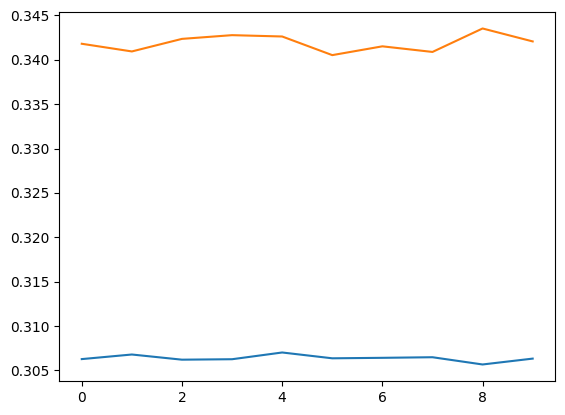

In [43]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])